# Building blocks of quantum circuits

## Hello world & Mess around with Qiskit

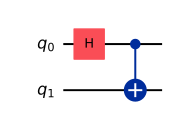

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

## Implement Deutsch’s algorithm using Qiskit.

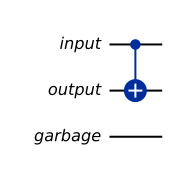

In [7]:
from qiskit import QuantumRegister

input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')

Uf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Uf.cx(input_bit[0], output_bit[0])

Uf.draw()

## Exact Simulation

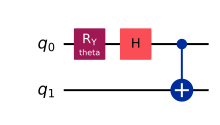

In [8]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
 
# circuit for which you want to obtain the expected value
qc = QuantumCircuit(2)
qc.ry(Parameter('theta'), 0)
qc.h(0)
qc.cx(0,1)
qc.draw("mpl", style="iqp")

In [9]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
 
# observable(s) whose expected values you want to compute
from qiskit.quantum_info import SparsePauliOp
observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs=[1, 1, -1, 1])
 
# value(s) for the circuit parameter(s)
parameter_values = [[0], [np.pi/6], [np.pi/2]]

In [10]:
# Generate a pass manager without providing a backend
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1)
isa_circuit = pm.run(qc)
isa_observable = observable.apply_layout(isa_circuit.layout)

In [11]:
from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()

In [12]:
job = estimator.run([(isa_circuit, isa_observable, parameter_values)])
result = job.result()
print(f" > Result class: {type(result)}")

 > Result class: <class 'qiskit.primitives.containers.primitive_result.PrimitiveResult'>


In [13]:
print(f" > Expectation value: {result[0].data.evs}")
print(f" > Metadata: {result[0].metadata}")

 > Expectation value: [4.         3.73205081 2.        ]
 > Metadata: {'target_precision': 0.0, 'circuit_metadata': {}}


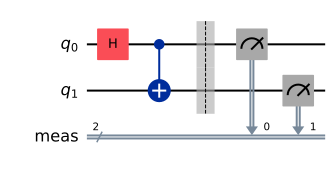

In [15]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw("mpl", style="iqp")

In [16]:
# Generate a pass manager without providing a backend
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1)
isa_circuit = pm.run(qc)
isa_observable = observable.apply_layout(isa_circuit.layout)

In [17]:
from qiskit.primitives import StatevectorSampler
 
sampler = StatevectorSampler()

In [18]:
# execute 1 circuit with Sampler
job = sampler.run([isa_circuit])
pub_result = job.result()[0]
print(f" > Result class: {type(pub_result)}")

 > Result class: <class 'qiskit.primitives.containers.sampler_pub_result.SamplerPubResult'>


In [19]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
# create two circuits
circuit1 = qc.copy()
circuit2 = qc.copy()
 
# transpile circuits
pm = generate_preset_pass_manager(optimization_level=1)
isa_circuit1 = pm.run(circuit1)
isa_circuit2 = pm.run(circuit2)
# execute 2 circuits using Sampler
job = sampler.run([(isa_circuit1), (isa_circuit2)])
pub_result_1 = job.result()[0]
pub_result_2 = job.result()[1]
print(f" > Result class: {type(pub_result)}")

 > Result class: <class 'qiskit.primitives.containers.sampler_pub_result.SamplerPubResult'>


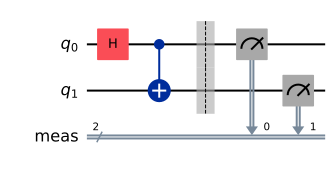

In [20]:
# Define quantum circuit with 2 qubits
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw()

In [21]:
# Transpile circuit
pm = generate_preset_pass_manager(optimization_level=1)
isa_circuit = pm.run(circuit)
# Run using sampler
result = sampler.run([circuit]).result()
# Access result data for PUB 0
data_pub = result[0].data
# Access bitstring for the classical register "meas"
bitstrings = data_pub.meas.get_bitstrings()
print(f"The number of bitstrings is: {len(bitstrings)}")
# Get counts for the classical register "meas"
counts = data_pub.meas.get_counts()
print(f"The counts are: {counts}")

The number of bitstrings is: 1024
The counts are: {'00': 504, '11': 520}
